In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import glob
import os, re

In [8]:
loss_dir = 'logs/losses'
name = 'STLSTM*'

files = glob.glob(os.path.join(loss_dir, name))
print(files)

['logs/losses/STLSTM_t32_d_3_ep14_l1.npy', 'logs/losses/STLSTM_t32_d_5_ep14_l1.npy', 'logs/losses/STLSTM_t32_d_4_ep14_l1.npy', 'logs/losses/STLSTM_t32_d_6_ep14_l1.npy', 'logs/losses/STLSTM_t32_d_7_ep14_l1.npy', 'logs/losses/STLSTM_t32_d_2_ep14_l1.npy', 'logs/losses/STLSTM_t32_d_0_ep14_l1.npy', 'logs/losses/STLSTM_t32_d_1_ep14_l1.npy']


In [9]:
DF = pd.DataFrame()
depths = []
for file in files:
    losses = np.load(file)
    depth = int(re.findall(r'\d+', file)[1])
    depths.append(depth)
    df = pd.DataFrame({'depth':np.repeat(depth,len(losses)), 'loss':losses})
    DF = DF.append(df)
    print(depth, np.mean(losses), np.std(losses))
depths.sort()


3 0.0030569576 0.0005061357
5 0.009006585 0.0016838175
4 0.00436099 0.0008679384
6 0.009872781 0.002366656
7 0.013189257 0.0032860837
2 0.0027119692 0.0005056035
0 0.0011876348 0.00015938596
1 0.0018916026 0.0002941443


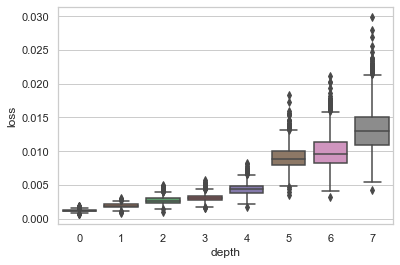

In [10]:
sns.set_theme(style="whitegrid")

ax = sns.boxplot(x="depth", y="loss", data=DF, order=depths)

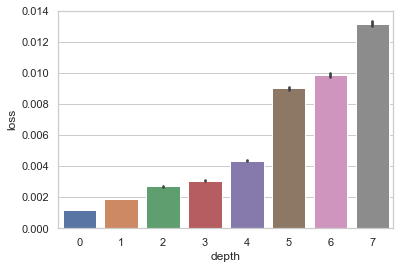

In [11]:
ax = sns.barplot(x="depth", y="loss", data=DF, order=depths)

In [12]:
np.std(losses), np.mean(losses)

(0.0002941443, 0.0018916026)